In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [4]:
# Task 1
sales_df=pd.read_csv("DS1_C9_S2_Practice_BikeSales_Data.csv")
sales_df

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,26-11-2013,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
1,26-11-2015,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
2,02-08-2013,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5.0,45,120.0,369.0,225.0,594
3,02-08-2015,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,45,120.0,517.0,315.0,832
4,02-09-2013,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2.0,45,120.0,148.0,90.0,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,18-02-2014,18,February,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,13.0,2,5.0,38.0,26.0,64
496,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,31.0,2,5.0,91.0,62.0,153
497,18-02-2016,18,February,2016,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,11.0,2,5.0,32.0,22.0,54
498,04-03-2014,4,March,2014,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,5.0,2,5.0,15.0,10.0,25


In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              500 non-null    object 
 1   Day               500 non-null    int64  
 2   Month             500 non-null    object 
 3   Year              500 non-null    int64  
 4   Customer_Age      500 non-null    int64  
 5   Age_Group         500 non-null    object 
 6   Customer_Gender   500 non-null    object 
 7   Country           500 non-null    object 
 8   State             500 non-null    object 
 9   Product_Category  500 non-null    object 
 10  Sub_Category      500 non-null    object 
 11  Product           500 non-null    object 
 12  Order_Quantity    495 non-null    float64
 13  Unit_Cost         500 non-null    int64  
 14  Unit_Price        497 non-null    float64
 15  Profit            498 non-null    float64
 16  Cost              498 non-null    float64
 1

In [9]:
sales_df_c=sales_df
columns=sales_df_c.columns
columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [11]:
# Describe Data For Understanding its Features
sales_df_c.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,500.000000,500.000000,500.000000,495.000000,500.000000,497.000000,498.000000,498.000000,500.000000
mean,15.192000,2014.552000,36.588000,13.375758,16.548000,43.601610,208.435743,130.391566,343.216000
std,8.675579,1.116149,11.363649,9.249150,21.759473,58.344484,340.307443,210.001172,556.346929
min,1.000000,2013.000000,17.000000,1.000000,2.000000,5.000000,3.000000,2.000000,5.000000
25%,9.000000,2014.000000,31.000000,5.000000,2.000000,5.000000,41.000000,28.000000,69.000000
50%,16.000000,2014.000000,35.000000,12.000000,3.000000,9.000000,77.000000,50.000000,129.000000
75%,22.000000,2016.000000,42.000000,22.000000,45.000000,120.000000,163.500000,108.000000,272.000000
max,31.000000,2016.000000,73.000000,32.000000,59.000000,159.000000,2214.000000,1350.000000,3564.000000


In [13]:
# Task 2
sales_df_c.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      5
Unit_Cost           0
Unit_Price          3
Profit              2
Cost                2
Revenue             0
dtype: int64

In [15]:
sales_df_c=sales_df_c.fillna(sales_df_c.select_dtypes(exclude="object").mean())

In [17]:
sales_df_c.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [19]:
sales_df_c=sales_df_c.drop(["Date","Day","Month","Year"],axis=1)
sales_df_c

,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
1,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45,120.0,590.0,360.0,950
2,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5.0,45,120.0,369.0,225.0,594
3,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7.0,45,120.0,517.0,315.0,832
4,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2.0,45,120.0,148.0,90.0,238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,13.0,2,5.0,38.0,26.0,64
496,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,31.0,2,5.0,91.0,62.0,153
497,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,11.0,2,5.0,32.0,22.0,54
498,37,Adults (35-64),M,Canada,British Columbia,Accessories,Bottles and Cages,Water Bottle - 30 oz.,5.0,2,5.0,15.0,10.0,25


In [21]:
Num_col=sales_df_c.select_dtypes(exclude="object")
Num_col

,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,19,8.0,45,120.0,590.0,360.0,950
1,19,8.0,45,120.0,590.0,360.0,950
2,29,5.0,45,120.0,369.0,225.0,594
3,29,7.0,45,120.0,517.0,315.0,832
4,29,2.0,45,120.0,148.0,90.0,238
...,...,...,...,...,...,...,...
495,37,13.0,2,5.0,38.0,26.0,64
496,37,31.0,2,5.0,91.0,62.0,153
497,37,11.0,2,5.0,32.0,22.0,54
498,37,5.0,2,5.0,15.0,10.0,25


In [23]:
data=[]
for col in Num_col:
    lo=[]
    uo=[]
    columns_df=pd.Series(Num_col[col])
    Max=max(columns_df)
    Min=min(columns_df)
    Range=Max-Min
    Q1=columns_df.quantile(0.25)
    Q2=columns_df.quantile(0.50)
    Q3=columns_df.quantile(0.75)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for z in Num_col[col]:
        if z>UF:
            uo.append(z)
        elif z<LF:
            lo.append(z)
    data.append((col,Max,Min,Range,Q1,Q2,Q3,IQR,UF,LF,[lo,uo]))
columns_names=["Columns","Maximum","Minimum","Range","Q1","Q2","Q3","IQR","UF","LF","Outliers"]
datas=pd.DataFrame(data,columns=columns_names)
datas

,Columns,Maximum,Minimum,Range,Q1,Q2,Q3,IQR,UF,LF,Outliers
0,Customer_Age,73.0,17.0,56.0,31.0,35.0,42.0,11.0,58.50,14.50,"[[], [59, 59, 61, 61, 65, 65, 65, 65, 65, 65, ..."
1,Order_Quantity,32.0,1.0,31.0,5.0,12.0,22.0,17.0,47.50,-20.50,"[[], []]"
2,Unit_Cost,59.0,2.0,57.0,2.0,3.0,45.0,43.0,109.50,-62.50,"[[], []]"
3,Unit_Price,159.0,5.0,154.0,5.0,9.0,120.0,115.0,292.50,-167.50,"[[], []]"
4,Profit,2214.0,3.0,2211.0,41.0,77.0,166.5,125.5,354.75,-147.25,"[[], [590.0, 590.0, 369.0, 517.0, 443.0, 590.0..."
5,Cost,1350.0,2.0,1348.0,28.0,50.0,110.0,82.0,233.00,-95.00,"[[], [360.0, 360.0, 315.0, 270.0, 360.0, 270.0..."
6,Revenue,3564.0,5.0,3559.0,69.0,129.0,272.0,203.0,576.50,-235.50,"[[], [950, 950, 594, 832, 713, 950, 713, 594, ..."


In [25]:
def iqr_winsorization(df):
    df_c=df.copy()
    col_to_treat=df_c.columns
    for col in col_to_treat:
        Q1=df_c[col].quantile(0.25)
        Q2=df_c[col].quantile(0.50)
        Q3=df_c[col].quantile(0.75)
        UF=Q3+1.5*IQR
        LF=Q1-1.5*IQR
        df_c.loc[df_c[col]>UF,col]=UF
        df_c.loc[df_c[col]<LF,col]=LF
    return df_c
df=pd.DataFrame(Num_col)
treated_df=iqr_winsorization(df.copy())

C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_4432\1664005183.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '346.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_c.loc[df_c[col]>UF,col]=UF
C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_4432\1664005183.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '349.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_c.loc[df_c[col]>UF,col]=UF
C:\Users\Barath Bala\AppData\Local\Temp\ipykernel_4432\1664005183.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '576.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_c.loc[df_c[col]>UF,col]=UF


In [27]:
sales_df1=treated_df.loc[:,["Unit_Cost","Unit_Price","Order_Quantity","Revenue","Customer_Age"]]
sales_df1

,Unit_Cost,Unit_Price,Order_Quantity,Revenue,Customer_Age
0,45.0,120.0,8.0,576.5,19.0
1,45.0,120.0,8.0,576.5,19.0
2,45.0,120.0,5.0,576.5,29.0
3,45.0,120.0,7.0,576.5,29.0
4,45.0,120.0,2.0,238.0,29.0
...,...,...,...,...,...
495,2.0,5.0,13.0,64.0,37.0
496,2.0,5.0,31.0,153.0,37.0
497,2.0,5.0,11.0,54.0,37.0
498,2.0,5.0,5.0,25.0,37.0


In [29]:
scaler=StandardScaler()
df_scaled_data=scaler.fit_transform(sales_df1)
df_scaled_data=pd.DataFrame(df_scaled_data,columns=sales_df1.columns)
df_scaled_data

,Unit_Cost,Unit_Price,Order_Quantity,Revenue,Customer_Age
0,1.308878,1.314706,-0.584735,1.826079,-1.549292
1,1.308878,1.314706,-0.584735,1.826079,-1.549292
2,1.308878,1.314706,-0.911053,1.826079,-0.668412
3,1.308878,1.314706,-0.693508,1.826079,-0.668412
4,1.308878,1.314706,-1.237371,0.136684,-0.668412
...,...,...,...,...,...
495,-0.669252,-0.664278,-0.040872,-0.731720,0.036292
496,-0.669252,-0.664278,1.917035,-0.287537,0.036292
497,-0.669252,-0.664278,-0.258417,-0.781629,0.036292
498,-0.669252,-0.664278,-0.911053,-0.926363,0.036292


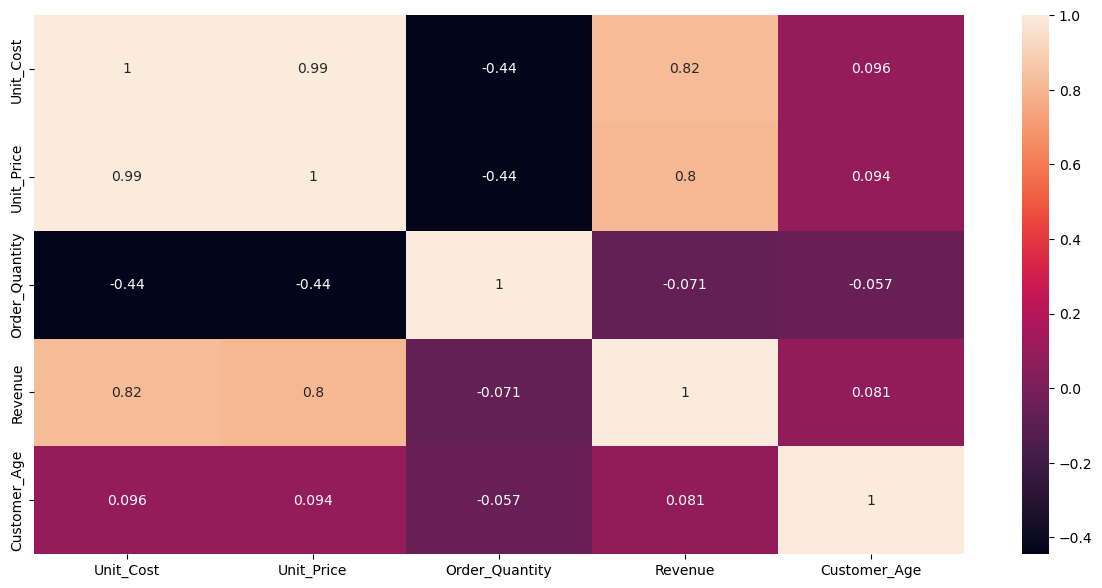

In [31]:
fig,ax=plt.subplots(1,1,figsize=(15,7))
sns.heatmap(df_scaled_data.corr(),annot=True,ax=ax)
plt.show()

In [32]:
corr=df_scaled_data.corr()[["Revenue"]].sort_values(["Revenue"])
corr

,Revenue
Order_Quantity,-0.070528
Customer_Age,0.081092
Unit_Price,0.804100
Unit_Cost,0.815590
Revenue,1.000000


In [35]:
df_selected_data=df_scaled_data.loc[:,["Unit_Cost","Revenue"]]
df_selected_data

,Unit_Cost,Revenue
0,1.308878,1.826079
1,1.308878,1.826079
2,1.308878,1.826079
3,1.308878,1.826079
4,1.308878,0.136684
...,...,...
495,-0.669252,-0.731720
496,-0.669252,-0.287537
497,-0.669252,-0.781629
498,-0.669252,-0.926363


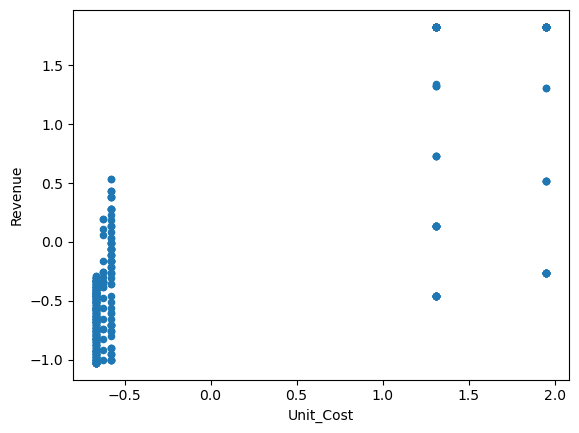

In [37]:
fig,ax=plt.subplots()
ax.set_xlabel("xlabel",fontsize=10)
ax.set_ylabel("ylabel",fontsize=10)
df_selected_data.plot.scatter(x="Unit_Cost",y="Revenue",ax=ax)
plt.show()

In [38]:
# Task 3
X_gr=np.array(df_selected_data["Unit_Cost"]).reshape(-1,1)
y=np.array(df_selected_data["Revenue"])

In [59]:
X_train_gr,X_test_gr,y_train,y_test=train_test_split(X_gr,y,test_size=0.3,random_state=100)

In [61]:
s_model=LinearRegression().fit(X_train_gr,y_train)
s_model

LinearRegression()

In [63]:
print("Intercept:",s_model.intercept_)
print("slope:",s_model.coef_)

Intercept: 0.010158105485677763
slope: [0.83964376]


In [65]:
# Ṭask 4
y_pred_gr=s_model.predict(X_test_gr)
y_pred_gr

array([ 1.10914934,  1.10914934, -0.55177513, -0.55177513,  1.10914934,
       -0.55177513, -0.55177513, -0.55177513,  1.64991545,  1.64991545,
        1.64991545,  1.10914934,  1.64991545, -0.55177513, -0.51314898,
       -0.47452283, -0.55177513, -0.55177513, -0.47452283, -0.55177513,
       -0.47452283, -0.55177513,  1.10914934, -0.55177513, -0.51314898,
       -0.55177513,  1.10914934, -0.47452283, -0.55177513,  1.10914934,
       -0.55177513, -0.47452283, -0.55177513, -0.55177513,  1.10914934,
       -0.55177513, -0.55177513, -0.55177513,  1.10914934,  1.10914934,
        1.64991545, -0.55177513, -0.55177513, -0.55177513, -0.55177513,
       -0.55177513, -0.55177513, -0.55177513, -0.55177513, -0.55177513,
       -0.55177513, -0.55177513, -0.47452283, -0.55177513,  1.10914934,
       -0.55177513, -0.55177513,  1.10914934, -0.55177513, -0.55177513,
       -0.55177513, -0.47452283,  1.64991545, -0.55177513, -0.47452283,
       -0.47452283, -0.51314898, -0.47452283, -0.55177513, -0.51

In [67]:
import warnings 
warnings.filterwarnings("ignore")
MSE=mean_squared_error(y_test,y_pred_gr)
print("MSE",MSE)
MAE=mean_absolute_error(y_test,y_pred_gr)
print("MAE",MAE)
RSME=mean_squared_error(y_test,y_pred_gr,squared=False)
print("RSME",RSME)
R2_SCORE=r2_score(y_test,y_pred_gr)
print("R2_SCORE",R2_SCORE)

MSE 0.36958536058455027
MAE 0.45017656465101197
RSME 0.6079353259883409
R2_SCORE 0.5980841387271194


In [69]:
selected=np.array(df_selected_data["Unit_Cost"]).reshape(-1,1)

In [71]:
Predictions_values=s_model.predict(selected)
print(Predictions_values[-1])

-0.5517751335869419


In [73]:
def calculating_residuals(model,feature,label):
    Predictions=model.predict(feature)
    df_results=pd.DataFrame({"Actual":label,"Predictions":Predictions})
    df_results["Residuals"]=abs(df_results["Actual"]-abs(df_results["Predictions"]))
    return df_results
def Linear_regression(model,feature,label):
    df_results=calculating_residuals(model,feature,label)
    sns.lmplot(x="Actual",y="Predictions",data=df_results,fit_reg=False)
    line_cords=np.arange(df_results.min().min(),df_results.max().max())
    plt.plot(line_cords,line_cords,color="darkorange")
    plt.show()

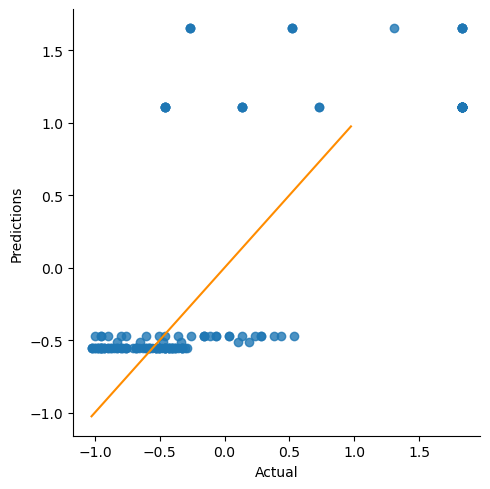

In [75]:
Linear_regression(s_model,X_test_gr,y_test)